In [1]:
# Identification
yourNameSurname='Niccolò Morabito'
yourMatricolaNumber='1808746'
yourStudentEMAIL='morabito.1808746@studenti.uniroma1.it'

# Machine Learning 2020/2021 - Challenge 

#### 1. Mandatory Rules
#### 2. The Dataset
- #### 2.1 Load the dataset
- #### 2.2 Dataset Analysis

#### 3. Classification
- #### 3.1 Preprocessing
- #### 3.2 Model Selection
- #### 3.3 Evaluation

#### 4. Summary


<hr>

## 1. Mandatory Rules (read carefully):
- This year the results of the challenges will count 8/30 of your final score.
- Only one submission is allowed. We will not consider multiple submissions.
- Please remember your solution must be <b>"YOUR SOLUTION"</b>, hence you are requested to deliver your individual answers/arguments/opinions/critics.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it <b>10 days before the date of a written exam (NO EXCEPTIONS)</b> if you miss to deliver your solution you must wait the next (if any) available deadline. 
- The subject of your email must be: "[Challenge_solution] NAME - SURNAME - MATRICOLA".
- Double check the subject of your email and the attachments.
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b> (NO RAR,7Z etc..).
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>.
- Your solution might be considered as the "copy" of others solutions, in that specific case the resulting score for all involved students will be 0/8.
- Then read carefully all the part of the jupyter notebook and fill all fields.
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b>.  
- If you have questions <b>Don't write "personal" emails</b> to Stefano Faralli, instead <b>use our google group</b>.
- A solution having a summary discussion with less than 500 words is evaluated with 0 points.

<hr>

## 2. The Dataset (up to 1/8 points)
<img width='400' src='videogames.jpg'/>

- The topic of the challenge is "Video games";
- The dataset consists of one single csv file ("video_games.csv");
- The full description of the dataset is available at: <a href='https://corgis-edu.github.io//corgis/csv/video_games/'>github project page</a>;

[1] Cox, Joe. “What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics 35.3 (2014): 189-198

## 2.1 Load the Dataset (up to 0.2/8 points)
In the following two cells: a code cell and, a markdown cell, where: 
- you write the code to create a pandas DataFrame by loading the "video_games.csv" file.  
- you describe the problems and the solution for loading the same csv file to a numpy datastructure.

In [2]:
import pandas as pd

# Read dataset
df = pd.read_csv('video_games.csv', header=0)

# type conversion for some string columns
df['Title'] = df['Title'].astype('category')
df['Metadata.Genres'] = df['Metadata.Genres'].astype('category')
df['Metadata.Publishers'] = df['Metadata.Publishers'].astype('category')
df['Release.Console'] = df['Release.Console'].astype('category')
df['Release.Rating'] = df['Release.Rating'].astype('category')

df.dtypes

Title                            category
Features.Handheld?                   bool
Features.Max Players                int64
Features.Multiplatform?              bool
Features.Online?                     bool
Metadata.Genres                  category
Metadata.Licensed?                   bool
Metadata.Publishers              category
Metadata.Sequel?                     bool
Metrics.Review Score                int64
Metrics.Sales                     float64
Metrics.Used Price                float64
Release.Console                  category
Release.Rating                   category
Release.Re-release?                  bool
Release.Year                        int64
Length.All PlayStyles.Average     float64
Length.All PlayStyles.Leisure     float64
Length.All PlayStyles.Median      float64
Length.All PlayStyles.Polled        int64
Length.All PlayStyles.Rushed      float64
Length.Completionists.Average     float64
Length.Completionists.Leisure     float64
Length.Completionists.Median      

Dataset is loaded creating a DataFrame - categorical features types are converted into the right type just for clarity. 

Loading the csv file with pandas DataFrame is quite easy because you just have to specify the csv filename as a parameter of `read_csv()` method. `header` parameter is 0 by default and this allows to infer the column names from the header of the file.

In order to load a dataset from csv to a numpy data structure you can use `genfromtxt()`, which has similar behaviour. The first difference is the separator, which by default is different between the two methods. However, there are other differences that constitute some problems:

- `genfromtxt()` will give an error if the number of columns is unequal in the different rows. Possible solution: to pass the parameter `usecols=np.arange(0,C)`, where `C` = #columns in the header

- `genfromtxt()` can deal with data types using the parameter `dtype` which represents the data type of the resulting array and if it is `None` the dtypes will be individually determined by the contents of each column. However, if the values of the csv are included between double quotes (as in this case), the types are not inferred and all the values are treated as a string with double quotes inside. Instead, `read_csv()` automatically recognize types, distinguishing between object, boolean and numbers (`int` or `float`).

## 2.2 Dataset Analysis (up to 0.8/8 points)
In the following code cell (feel free to create new cells), remember to comment your code snippets:

1) Print the total number of samples;

2) Print a table with the first 15 samples;

3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers";	

6) Perform feature importance analysis; 

In [3]:
# 1) printing the total number of samples
n_samples = df.shape[0]
print(f"The total number of instances is: {n_samples}")

The total number of instances is: 1212


`pandas.DataFrame.shape`, accordingly to the documentation, returns a tuple representing the dimensionality of the DataFrame. The first element of this tuple corresponds to the number of samples, the second one to the number of columns. The videogames dataset contains 1212 instances.

In [4]:
# 2) printing a table with the first 15 samples
pd.set_option('display.max_columns', None) # setting option to display all the columns
df.head(15) # display the first 15 samples 

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Re-release?,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.000000,20,22.016667,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.000000,0,0.000000,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,4.566667,11.566667,2.500000,57,2.266667,10.000000,14.100000,7.250000,16,6.800000,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,13.250000,48.383333,10.000000,37,7.066667,72.566667,78.866667,72.566667,2,66.283333,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,0.41,12.95,Nintendo DS,M,True,2004,21.933333,25.500000,20.000000,7,16.733333,30.033333,30.033333,30.033333,2,30.033333,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,0.36,19.95,Sony PSP,E,True,2004,0.816667,1.050000,0.883333,6,0.583333,1.250000,1.250000,1.250000,1,1.250000,0.883333,0.933333,0.883333,2,0.833333,0.616667,0.783333,0.533333,3,0.450000
7,Metal Gear Ac!d,True,1,True,True,Strategy,True,Konami,True,75,0.34,17.95,Sony PSP,E,True,2004,25.383333,51.650000,21.266667,18,19.166667,80.000000,80.000000,80.000000,1,80.000000,24.833333,27.483333,25.100000,6,21.916667,20.700000,23.600000,20.783333,11,17.883333
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,0.25,8.95,Nintendo DS,T,True,2004,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,Pokmon Dash,True,1,True,True,Racing / Driving,True,Nintendo,True,46,0.22,24.95,Nintendo DS,T,True,2004,3.833333,7.250000,1.183333,4,1.750000,12.000000,12.000000,12.000000,1,12.000000,0.000000,0.000000,0.000000,0,0.000000,1.116667,1.200000,1.083333,3,1.050000


The first line of this code snippet (`pd.set_option('display.max_columns', None)`) sets the option to display all the columns; the `df.head(X)` method displays the first `X` samples in the DataFrame `df`. In this case, it is possible to see the values of the first 15 instances for each possible feature.

We can start watching at data composition and notice some characteristics. For example, the fact that the `Metadata.Genres` values can contain more comma-separated values (e.g. `Action,Adventure,Role-Playing (RPG)` means that the corresponding record has three genres: `Action`, `Adventure` and `Role-Playing (RPG)`).

<AxesSubplot:>

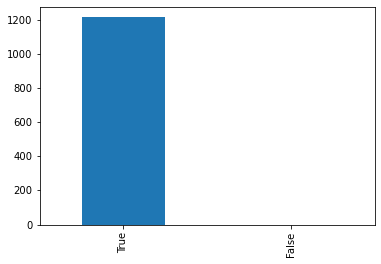

In [5]:
# 3) plotting the histogram distribution of "Features.Handheld?"
df['Features.Handheld?'].value_counts().append(pd.Series([0], index=[False])).plot(kind='bar')

In order to plot the histogram distribution of a feature `f`, we use the `value_counts()` method to get the count of unique occurrences in column `f` and then we plot the resulting series with the `plot(kind='bar')` method.

Since all the instances `x` in the dataset have `x.Features.Handheld? = True`, we add a dummy false `Serie` (0 occurrences) in order to show both the values of the boolean feature in the resulting histogram. The resulting graph is pretty intuitive tough: this feature is not representative, i.e. it is not going to affect any prediction since all the instances have the same value.

<AxesSubplot:>

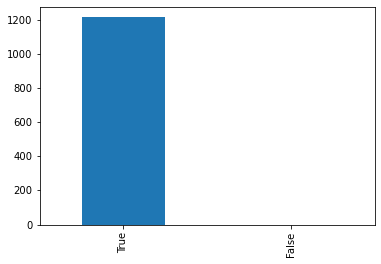

In [6]:
# 4) plotting the histogram distribution of "Features.Online?"
df['Features.Online?'].value_counts().append(pd.Series([0], index=[False])).plot(kind='bar')

In order to plot the histogram distribution of a feature `f`, we use the `value_counts()` method to get the count of unique occurrences in column `f` and then we plot the resulting series with the `plot(kind='bar')` method.

Since all the instances `x` in the dataset have `x.Features.Online? = True`, we add a dummy false `Serie` (0 occurrences) in order to show both the values of the boolean feature in the resulting histogram. Even in this case, the resulting graph is pretty intuitive and the corresponding feature is not representative, i.e. it is not going to affect any prediction since all the instances have the same value.

<AxesSubplot:>

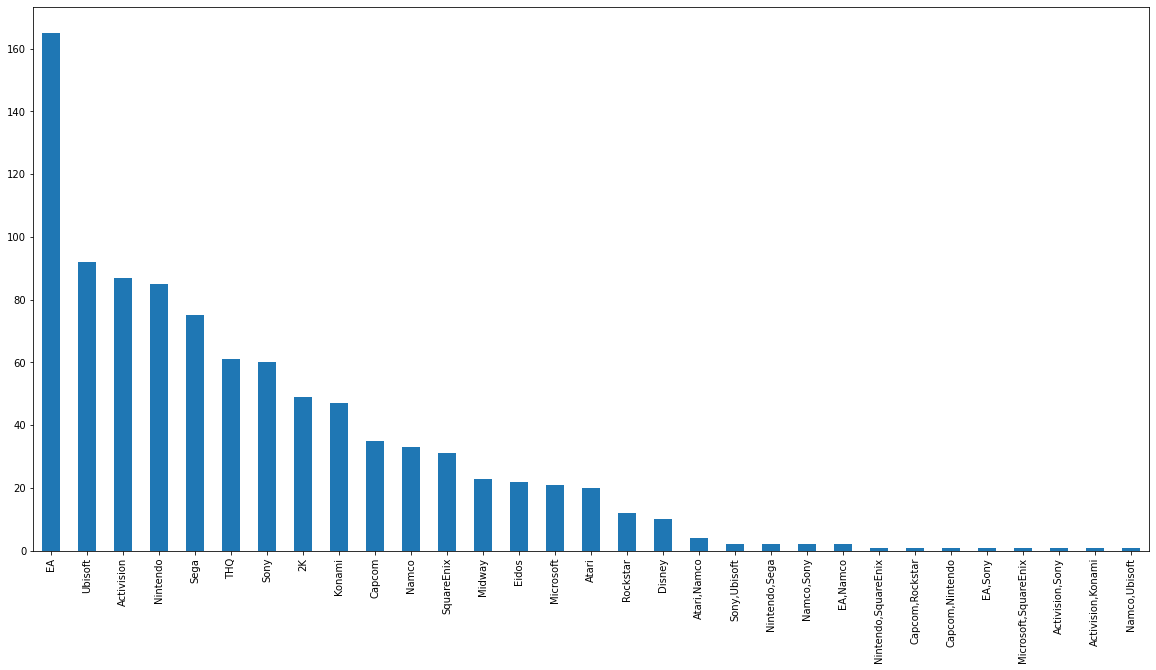

In [7]:
# 5) plotting the histogram distribution of "Metadata.Publishers"
df['Metadata.Publishers'].value_counts().plot(kind='bar', figsize=(20,10))

The method to plot the histogram distribution of a feature is still the same. In this case, however, we do not add a dummy `Serie` since this feature is not boolean but instead it is categorical. Printing `set(df['Metadata.Publishers'].values)`, we can see that there are 32 possible string values:

`{nan, 'THQ', 'EA,Namco', 'Sega', 'Microsoft', 'Activision', 'EA', 'Capcom', 'Ubisoft', 'Sony', 'SquareEnix', 'Capcom,Nintendo', 'Capcom,Rockstar', '2K', 'Disney', 'Atari,Namco', 'EA,Sony', 'Namco,Sony', 'Eidos', 'Microsoft,SquareEnix', 'Nintendo', 'Activision,Konami', 'Nintendo,Sega', 'Nintendo,SquareEnix', 'Rockstar', 'Namco,Ubisoft', 'Konami', 'Activision,Sony', 'Atari', 'Sony,Ubisoft', 'Namco', 'Midway'}`

The first observations we can make are the following ones:
- we are going to need to deal with the `nan` values (representing a non-specified value for the `Metadata.Publishers` feature) which are not plotted in the histogram above;
- some values are just the joint string of two publishers; e.g. the instances with `Metadata.Publishers='Activision,Konami'` can be considered to have two publishers: `Activision` and `Konami○`. We are going to consider these cases during encoding of categorical features \[see next Section\]

In [8]:
# 6) perform feature importance analysis
# method with decision trees

from sklearn import tree

# removing 'Title' column
df_fi = df.drop(['Title'], axis=1)
# obtaining dummy columns to encode 'Metadata.Publishers' feature
dummy_publishers = df_fi['Metadata.Publishers'].str.get_dummies(sep=',').add_prefix('Metadata.Publisher ')
# obtaining dummy columns to encode 'Metadata.Genres' feature
dummy_genres = df_fi['Metadata.Genres'].str.get_dummies(sep=',').add_prefix('Metadata.Genre ')

df_fi = pd.concat([df_fi, dummy_publishers, dummy_genres], axis=1)
df_fi.drop(['Metadata.Publisher nan', 'Metadata.Publishers', 'Metadata.Genres'], axis=1, inplace=True)

for feature in df_fi:
    # remove missing values imputing NaN with most frequent value in the column
    df_fi[feature].fillna(df_fi[feature].mode(1)[0], inplace=True)

    # encoding all the remaining categorical features with "classic" one-hot encoding
    if df_fi[feature].dtype.name == "category":
        new_columns = pd.get_dummies(df_fi[feature], prefix=feature)
        df_fi.drop([feature], axis=1, inplace=True) # drop the original feature column
        df_fi = pd.concat([df_fi, new_columns], axis=1) # concat new columns with the original df_fi

# training to predict 'Metrics.Review Score'
reg = tree.DecisionTreeRegressor()
X = df_fi.drop(["Metrics.Review Score"], axis=1)
y = df_fi["Metrics.Review Score"]
reg.fit(X, y)

# printing feature importances
name_to_importance = pd.DataFrame({'Feature Name': X.columns, 'Feature importance': reg.feature_importances_})
pd.set_option('display.max_rows', None)
print(name_to_importance)

                         Feature Name  Feature importance
0                  Features.Handheld?            0.000000
1                Features.Max Players            0.007109
2             Features.Multiplatform?            0.000000
3                    Features.Online?            0.000000
4                  Metadata.Licensed?            0.000000
5                    Metadata.Sequel?            0.000000
6                       Metrics.Sales            0.147991
7                  Metrics.Used Price            0.043757
8                 Release.Re-release?            0.000000
9                        Release.Year            0.017377
10      Length.All PlayStyles.Average            0.011087
11      Length.All PlayStyles.Leisure            0.025058
12       Length.All PlayStyles.Median            0.061857
13       Length.All PlayStyles.Polled            0.013374
14       Length.All PlayStyles.Rushed            0.013124
15      Length.Completionists.Average            0.007686
16      Length

We are going to evaluate feature importances with a decision tree. In particular, since in this case the target feature is continuous, we are going to train a `DecisionTreeRegressor`. The `DecisionTreeRegressor` class of Scikit Learn library does not accept categorical features. Therefore, we need to deal with the string columns in the dataframe. We do such preprocessing here and we will reuse the new dataframe obtained also in the following sections since even the other algorithms that are going to be used do not accept categorical features.

The categorical features in the videogames dataset are the following ones:
- `Title`
- `Metadata.Genres`
- `Metadata.Publishers`
- `Release.Console`
- `Release.Rating`

The simplest way to encode a categorical feature is **label encoding**: each possible value of the categorical feature is simply converted to a number. In order to label-encode a feature `f` with `pandas`, we could simply execute: `df[f] = df[f].cat.codes`

The problem with this approach is that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This is quite evident in Decision Trees, which would split the data without any sense if the categorical feature is not ordinal. The only categorical feature in our dataset which has an order is the `Release.Rating` one, but as we are going to see the problem lies in the other ones. Therefore we need to use another approach for the others, which is **one-hot encoding**. 

Since we are going to substitute the column of the feature `f` with a set of `m` columns (where `m` is the number of possible values for `f`), let's take a look to the number of possible values that each categorical feature can have, printing `len(set(df[f]))` for each feature `f`:

- `len(set(df_fi["Title"])) = 908`
- `len(set(df_fi["Metadata.Genres"])) = 48`
- `len(set(df_fi["Metadata.Publishers"])) = 32`
- `len(set(df_fi["Release.Console"])) = 5`
- `len(set(df_fi["Release.Rating"])) = 3`

`len(set(df[f]))` is equal to the number of different values in the column `f`, i.e. the number of columns in a dummy one-hot encoding. If these numbers are too large, we could have too many features that would lead to an explosion in the training time and space. Therefore, we obviously cannot one-hot encode `Title`, `Metadata.Genres` and `Metadata.Publishers` as they are.

First of all, we are going to exclude the `Title` column because it has more than 900 possible values, and a one-hot encoding would lead to having more than 900 features; moreover, label encoding cannot be used because there is no order in titles and decision tree would end up with splits that do not make sense. It could have some importance in the prediction of the target feature, since we have some repeated values that could be representative, but the cost is too high for a very small information gain, therefore I preferred to discard this column.

Let's consider the `Metadata.Genres` and `Metadata.Publishers` features. They both have a big number of possible values but we already noticed in Section 2.2 (2nd request) that values in `Metadata.Genres` feature can be composed by a string of more genres, separated by a comma. The same can be said by studying values of the `Metadata.Publishers` column:

In [9]:
print("Possible genres:")
print(set(df['Metadata.Genres']))
print("\nPossible publishers:")
print(set(df['Metadata.Publishers']))

Possible genres:
{'Action,Racing / Driving', 'Racing / Driving,Simulation,Sports', 'Action,Role-Playing (RPG),Strategy', 'Simulation,Sports', 'Racing / Driving,Simulation', 'Role-Playing (RPG),Simulation', 'Adventure,Simulation,Sports', 'Adventure,Educational,Strategy', 'Action,Adventure', 'Action,Simulation,Strategy', 'Adventure,Role-Playing (RPG),Strategy', 'Action,Educational', 'Action,Role-Playing (RPG),Simulation,Sports,Strategy', 'Educational,Simulation', 'Action,Strategy', 'Action,Adventure,Racing / Driving,Sports', 'Adventure,Simulation', 'Role-Playing (RPG),Simulation,Strategy', 'Sports', 'Racing / Driving', 'Educational,Sports', 'Adventure,Role-Playing (RPG)', 'Action', 'Action,Racing / Driving,Role-Playing (RPG)', 'Action,Role-Playing (RPG)', 'Racing / Driving,Simulation,Strategy', 'Action,Racing / Driving,Sports,Strategy', 'Action,Adventure,Strategy', 'Educational,Strategy', 'Action,Simulation,Sports', 'Simulation', 'Sports,Strategy', 'Role-Playing (RPG)', 'Action,Racing / 

We have 8 genres, the other possible values are just concatenation of these 8 genres. Therefore, we encode the `Metadata.Genres` to 8 binary features, and a record with genre = `Action,Racing / Driving,Role-Playing (RPG)` will have 1 in `Metadata.Genre Action`, `Metadata.Genre Racing / Driving` and `Metadata.Genre Role-Playing (RPG)` columns. In order to do that, we simply execute the following line of code:

`df_fi['Metadata.Genres'].str.get_dummies(sep=',').add_prefix('Metadata.Genre ')`

which returns the dummy columns for genres splitting each value of the feature on the comma and adding the prefix "Metadata.Genre " to the column name just for clarity. Finally, the obtained columns are concatenated to the original dataframe and the original `Metadata.Genres` column is dropped.

The same process is repeated for the `Metadata.Publishers` column, except for one difference: since in the possible publishers there is also the `nan` value, which denotes the missing of the publisher in that particular record, the final list of dummy columns will contain also the `Metadata.Publisher nan` column. This column is going to be enhanced to 1 for the records that have no publisher, but it can be noticed that it is exactly the same case in which all publisher columns are 0. Therefore, no more information is added by this column and can be dropped out. In this case, moreover, we can prevent imputation on the `Metadata.Publishers` column, that would have resulted in fictitious values.

For the remaining categorical features (`Release.Console` and `Release.Rating`) we can proceed with the classic one-hot encoding that will result in 8 new columns (5 for the consoles and 3 for the ratings).

Finally, all the missing values are managed substituing them with the most frequent value in the corresponding column. This allows to use the same strategy for all the columns.

After encoding of categorical features and imputation of `NaN` values, we can proceed with the training of a `DecisionTreeRegressor` with `Metrics.Review Score` as the target feature. All the data is used for fitting and no other pre-processing actions are carried out. After that, we simply print the feature importance formatting the feature names and importances with a dataframe.

<hr>

## 3. Classification (up to 7/8 points)
In this part of the tutorial you are requested to perform all the necessary steps required in order to design a full fledged classification task on the <b>Metrics.Review Score</b>.

You are requested to perform the following steps having in mind the following: 

1) the dataset must be properly splitted to perform crossvalidation during model selection/hyper parameter tuning and to test during the evaluation step 

2) features must be properly encoded

3) the target feature can be dicretized <b>(number of classes must be greater than 5)</b> in order to simplify the problem;

4) for model selection you are requested to consider: 
    - Decision Trees
    - Support Vector Machines;
    - An ensamble methodology;
    - MLPNs.
    
5) during model selection hyper-parameter tuning must be performed and discussed;

6) class imbalancing must be addressed (when appropriate);

7) remember to apply standardizion and normalization when appropriate;

8) provide a discussion of model selection where you describe the differences in terms of performance and explains the root causes;

9) describe the measure adopted for the evaluation and discuss the results;

#### 3.1 Preprocessing (up to 2/8 points)
Write the necessary code to perfrom an adequate prepocessing, <b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In [10]:
# 2) features must be properly encoded
# missing values must be managed
df_c = df_fi

In the first part of preprocessing, we should properly encode features and, in particular, categorical ones. Moreover, we should also deal with missing values. However, these two preprocessing tasks have been carried out during the last part of Section 2.2 for the Dataset Analysis and the processes have been explained deeply in the previous cells. Therefore, we are just going to use the `df_fi` dataframe also for this part of the challenge.

In [11]:
# 3) the target feature (Metrics.Review Score) can be dicretized (number of classes must be greater than 5)
# in order to simplify the problem

df_c["Metrics.Review Score"] = pd.cut(
    df_c["Metrics.Review Score"],
    7,
    labels = ['Extremely low', 'Very low', 'Low', 'Medium', 'High', 'Very high', 'Extremely high']
)
pd.set_option('display.max_rows', 20)
print(df_c["Metrics.Review Score"])

0            Very high
1       Extremely high
2            Very high
3            Very high
4               Medium
             ...      
1207              High
1208            Medium
1209               Low
1210            Medium
1211          Very low
Name: Metrics.Review Score, Length: 1212, dtype: category
Categories (7, object): ['Extremely low' < 'Very low' < 'Low' < 'Medium' < 'High' < 'Very high' < 'Extremely high']


The target feature (`Metrics.Review Score`) is dicretized in order to simplify the problem. The cut function is used to segment and sort data values into bins. The input array to be binned is the 1-dimensional list of DataFrame corresponding to `Metrics.Review Score` feature; the `bins` parameter is set to 7 in order to have more than 5 classes and labels name are specified for clarity: `Extremely low`, `Very low`, `Low`, `Medium`, `High`, `Very high` and `Extremely high`.

In [12]:
# 6) class imbalancing must be addressed (when appropriate);

from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_c.drop("Metrics.Review Score", axis=1)
y = df_c["Metrics.Review Score"]
X, y = SMOTE().fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Very high': 406, 'Extremely high': 406, 'Medium': 406, 'High': 406, 'Low': 406, 'Very low': 406, 'Extremely low': 406})


Classes of the target features are unbalanced, as we can see calling
`df_c["Metrics.Review Score"].value_counts()`:

`High              406
Very high         329
Medium            263
Low               114
Extremely high     67
Very low           25
Extremely low       8`

For example, there are 406 instances for the `High` class and only 8 for the `Extremely low` one. Therefore, we need to oversample the minority classes or undersample the majority classes. Since the loss of data should be always prevented, the first approach is preferred. Using **SMOTE** (Synthetic Minority Oversampling Technique), moreover, new instances can be synthetically created, instead of just duplicate examples (which would not add any new information to the model). In order to do this, we use the `SMOTE` class of the `imbalanced-learn` library.

The total number of instances now becomes: `406*7 = 2842`.

In [13]:
print(f"The total number of instances is: {X.shape[0]}")

The total number of instances is: 2842


In [14]:
# 1) the dataset must be properly split to perform crossvalidation during model selection/hyper parameter tuning
# and to test during the evaluation step

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In order to perform cross-validation during model selection and HPs tuning, we are going to use `GridSearchCV` and `RandomizedSearchCV` classes that automatically split the set passed to the `fit` method and select one subset for testing from time to time.

Instead, we now split the dataset into two parts by simply using the `train_test_split` function specifying that the test set is going to be about one-third of the data. It will be used in the final evaluation step, while the remaining 67% of the dataset is going to be used to train models and perform cv for the HPs tuning in the model selection phase.

#### 3.2 Model Selection  (up to 3/8 points)
Write the necessary code to perfrom an adequate model selection. tips: for some models you may need to perform additional preprocessing steps (encoding, normalization, feature selection, class balancement, ...).
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

In [15]:
# 4) model selection, considering: Decision Trees, Support Vector Machines, An ensamble methodology and MLPNs
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 5) during model selection hyper-parameter tuning must be performed and discussed
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In order to select the best model, we are going to train Decision trees, SVMs, Random Forests and MLPNs. Each algorithm will be used with different hyperparameters, using `GridSearchCV` and `RandomizedSearchCV` classes to tune the best ones.

First of all, we need to specify a list of configurations of possible parameters. Each configuration is a dictionary in which the key is the parameter name and the value is a list of settings to try for that parameter. In the following code, we are going to use just one configuration, i.e. a model will be trained for each possible combination of parameters in the configuration. In order to decide what parameters to add and what settings to try, I read the official documentation for each algorithm and I selected the most important parameters, based also on the studied theory:
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and
[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

The tuning is performed using cross-validation, therefore each model is trained with a part of the training set and the performances are tested with one of the different folds the training set has been split into.

Secondly, we need to create a `GridSearchCV` or a `RandomizedSearchCV` object. In case the tuning time is too long, we should prefer the latter. That is the case of MLPNs, in which parameters are a lot and time expensive. In order to further reduce the time for tuning, other parameters of `GridSearchCV` and `RandomizedSearchCV` are specified:
- `cv = 3` which sets the number of folds to 3 instead of the default of 5;
- `n_jobs = -1` in order to exploit all the cores (the `-1` value denotes that the number of jobs to run in parallel is equal to the number of processors).


In [16]:
''' DECISION TREE '''

possible_parameters = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [None, 3, 8, 15, 25, 40, 60],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf'  : [1, 2, 3],
    'max_features' : ['auto', 'sqrt', 'log2']
}

dt_clf = GridSearchCV(
    tree.DecisionTreeClassifier(), possible_parameters, scoring='accuracy', n_jobs=-1
)

dt_clf.fit(X_train, y_train)

print(f"Best params: {dt_clf.best_params_}")
print(f"Best score: {dt_clf.best_score_}")

Best params: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.6444343141317862


We test both `criterion` and `splitter`, since these two parameters really affect the construction of the tree, by putting the two possible values for each. About the `max_depth` parameter, in addition to the `None` value (which corresponds to the maximum depth possible, 64 in this case) we add a few values with an exponential incrementation in order to test different depths and prevent overfitting (too deep trees). Indeed, the best classifier has `max_depth = 60`, which the biggest parameter but not the max depth possible. Finally, we test also some values for the splitting technique.

In [17]:
''' SUPPORT VECTOR MACHINE '''
# 7) remember to apply standardizion and normalization when appropriate
from sklearn import preprocessing

possible_parameters = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}



svm_clf = GridSearchCV(
    svm.SVC(), possible_parameters, cv=3, n_jobs=-1, scoring='accuracy'
)

# before fitting the model, we need to scale the training data
X_train_scaled = preprocessing.scale(X_train)
svm_clf.fit(X_train_scaled, y_train)

print(f"Best params: {svm_clf.best_params_}")
print(f"Best score: {svm_clf.best_score_}")

print()

Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.6228967435852854



In the case of SVMs, we need to scale the data before fitting the `GridSearchCV` because the RBF kernel assumes that all features are centred around zero and have variance in the same order. In this case, a standard scaling approach is used.

The regularization parameter `C` must be tuned since it can really affect the performance of the machines. Moreover, a few values for the gamma parameter and four kernels are also put in the possible parameters.

In [18]:
''' RANDOM FOREST '''

possible_parameters = {
    'n_estimators' : [100, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 3, 8, 15, 25, 40, 60],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf'  : [1, 2, 3],
    'max_features' : ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(
    RandomForestClassifier(), possible_parameters, cv=3, n_jobs=-1, scoring='accuracy'
)

rf_clf.fit(X_train, y_train)

print(f"Best params: {rf_clf.best_params_}")
print(f"Best score: {rf_clf.best_score_}")

Best params: {'criterion': 'entropy', 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best score: 0.7311044321352576


Since we are ensambling different decision trees, the possible parameters that have been selected are the same described for the previous training. In addition, we tune also the `n_estimators` parameter, which corresponds to the number of decision trees we want to ensemble. 

In [19]:
''' MLPN '''

possible_parameters = {
    'activation' : ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [ (5,), (50,), (100,), (1000,)]
}

nn_clf = RandomizedSearchCV(
    MLPClassifier(max_iter=3000, learning_rate='adaptive'), possible_parameters, scoring='accuracy', n_jobs=-1
)

# using scaled trainset
nn_clf.fit(X_train_scaled, y_train)

print(f"Best params: {nn_clf.best_params_}")
print(f"Best score: {nn_clf.best_score_}")

Best params: {'hidden_layer_sizes': (1000,), 'activation': 'relu'}
Best score: 0.6601947782842934


Also **Multi-layer Perceptron** is sensitive to feature scaling, that is why we use the same trainset as before, obtained by using standard scaling. Of course, in order to get meaningful results, we must apply scaling even to the test set. However, in this phase is not necessary because the testing phase is applied to one of the subset in which `X_train_scaled` is split during cross-validation. Scaling should be applied also to the test set during the next Evaluation phase if the selected model is going to be the SVM or the MLPN.

Some parameters have been fixed in the creation of the `RandomizedSearchCV` object (maximum number of iterations and the learning rate) since they affect the convergence of the training loss rather than the metrics and it was necessary to reduce execution times and prevent divergence. Using `learning_rate='adaptive'`, the value of the learning rate is reduced as soon as the training loss stops decreasing.

About possible parameters selection, we obviously have to specify all the activation functions (except the identity one) because this is an important aspect of the neural networks. Moreover, we should also try different sizes for the hidden layers (in this case, only one hidden layer is selected).

#### 3.3 Evaluation (up to 2/8 points)
Write the necessary code to perform an adequate model evaluation of the selected model. Confusion matrix and classsification reports are welcome. 
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and no discussion correpsonds to 0 POINTS</b>

In [20]:
# 8) provide a discussion of model selection where you describe the differences in terms of performance
# and explains the root causes

When you create a `GridSearchCV` or a `RandomizedSearchCV`, you can choose one single score trough which different models are compared. Of course, the process can be repeated with different metrics and selecting precision and recall would have probably given more information about the models' behaviour. However, in order to reduce the time of computation, I decided to use just accuracy. This is possible since the classes have been balanced and they all have (more or less) the same number of instances. *Note: they do not have exactly the same number instances even after SMOTE resampling because the `train_test_split` method split the dataset randomly and not taking into account the different classes. That can be verified by simply printing the `Counter` of `y_train` instead of all `y` set as done before:*

In [21]:
print(Counter(y_train))

Counter({'Very high': 280, 'Extremely high': 279, 'Extremely low': 278, 'Low': 277, 'Medium': 264, 'High': 263, 'Very low': 263})


Anyway, the number of instances is quite similar and accuracy is going to represent the percentage of correct predictions on the total.

I also executed all the code for model selection putting `scoring = f1_micro`  in the creation of the `GridSearchCV` or `RandomizedSearchCV` object in order to take into account also precision and recall. The results were very similar.

The models for each algorithm are going to be compared using the chosen scoring, because during the cross-validation process there will always be a subset chosen as testset on which to compute this score. The best estimator will be the one with the highest accuracy. After each fitting, the best score is printed and we can therefore select the model with best performance. Testing more combinations of parameters for all the algorithms would have possibly led to better results. However, for the aim of this project the result are encouraging and the best RandomForestClassifier reaches more than 70% of accuracy with an huge number of estimators (1000). Let's focus on this model for evaluation then.

In [22]:
#9) describe the measure adopted for the evaluation and discuss the results

import sklearn.metrics
from sklearn.metrics import classification_report

classifier = rf_clf.best_estimator_
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Extremely high       0.90      0.97      0.93       127
 Extremely low       0.99      0.98      0.99       128
          High       0.62      0.44      0.51       143
           Low       0.72      0.88      0.79       129
        Medium       0.61      0.60      0.60       142
     Very high       0.70      0.67      0.69       126
      Very low       0.90      0.96      0.93       143

      accuracy                           0.78       938
     macro avg       0.78      0.79      0.78       938
  weighted avg       0.77      0.78      0.77       938



The classifier we are evaluating is the best estimator obtained during HPs tuning phase for RandomForest classifiers. We are going to use the `predict` method to produce a list of predictions of the selected classifier on the `X_test` testset. These predictions must be compared with the ground truth (the `y_test` list of classes) and we can use the `classification_report` to show an overall report of the evaluation phase.

As we said before, the corresponding model was able to correctly classify more than the 70% of all the instances during the cross-validation phase. We expect better results evaluating it on a new set of data, otherwise that would be an overfitting signal.

In fact, the average accuracy is about 75%. In this case, we can also see other metrics (precision, recall and f-1 score) and even the number of occurrences of each class in `y_test`. It is important to study these results in order to understand how the prediction could be improved. As we can notice, the best-predicted class is the `Extremely low` with 95% of precision and 96% of recall, but even `Very low` and `Extremely high` classes have excellent results. If we remember from Section 3.1 when we addressed class imbalancing, the instances were distributed between the seven class in the following way:

`
High              406
Very high         329
Medium            263
Low               114
Extremely high     67
Very low           25
Extremely low       8
`

As we can see, the three classes that have a very low number of instances are indeed `Extremely low`, `Very low` and `Extremely high` and then we can notice that the metrics are higher for minor classes. This is quite intuitive, since the minor classes were synthetically oversampled and therefore the majority of the instances for these three classes are fake and probably over-represented. In the end, the good results depend mostly on the big similarity between instances of the minor classes. As proof of this, the class with the worst results is `High` which had the biggest number of "original" instances. These observations show that results are not completely reliable since the oversampling affects too much predictions. However, we know that the 60% of the games with an `High` review score (that are real instances) has been correctly classified. This is not an excellent result, but it not even bad since each instance has about 14% of probability to be randomly labelled with the correct class.

It is possible that collecting new data for minor classes would lead to better results on the major classes. In fact, even if the average accuracy could decrease (due to the fact the the minor classes are probably going to have worse peformance with "real" data), I expect more balanced results between the different classes in case no instances have been sintetically generated.

In [23]:
print(Counter(y_pred))

Counter({'Low': 158, 'Very low': 153, 'Medium': 139, 'Extremely high': 137, 'Extremely low': 127, 'Very high': 122, 'High': 102})


### 4. Summary

The objective of this Machine Learning challenge is to follow the ML workflow and build a model which can predict how likely a video game is going to be a blockbuster. The solutions depend on the single and specific requests.

In the first part of the challenge, the dataset is loaded and analysed. We use DataFrame both because it was requested and because it is a very simple way to manage a dataset, better than any numpy data structure. A simple method is called to read the csv containing all the data, and its header is used to name the columns. The features of the dataset are 36 and their names and types can be seen in the `Out [2]` cell. 

The dtypes of five features (`Title`, `Metadata.Genres`, `Metadata.Publishers`, `Release.Console`, `Release.Console` and `Release.Rating`) have been changed from `object` to `category` just for clarity; in both cases, corresponding columns must be considered categorical, that means their values are strings. Categorical features are not accepted by some training algorithms, but we are going to address this problem in the Preprocessing section. The majority of features is numerical but we have also some boolean.

Following the guidelines, the **Dataset Analysis** part contains some feature plots and a few prints to understand how the dataset is composed and structured. The dataset contains 1212 instances, and printing the first 15 ones we can also understand the meaning of each column and start noticing that:
- some values are missing (we are going to need to deal with `Nan` values);
- the `Metadata.Genres` column contains more comma-separated values (e.g. `Action,Adventure,Role-Playing (RPG)` means that the corresponding record has three genres: `Action`, `Adventure` and `Role-Playing (RPG)`).

The same behaviour can be observed for the `Metadata.Publishers` feature, watching the plot in the `Out [7]` cell. Even in this case, some strings are single publishers (like `EA` or `Ubisoft`) while some others contains more companies (e.g. the instances with `Metadata.Publishers='Activision,Konami'` can be considered to have two publishers: `Activision` and `Konami○`). We are going to consider both cases during encoding of categorical features.

The two boolean plotted features (`Features.Handheld?` and ` Features.Online?`) are useless. It can be easily inferred from the fact that all the instances have the same value `True`. Therefore, we could easily remove both the columns without losing any discriminant information. There is also an empirical evidence of the futility of these two features watching their importance according to the **feature analysis**: the values are equal to 0. 

The feature analysis process returns the importance of each feature training a model (in this case, a `DecisionTreeRegressor` because the target feature is continuous) that wants to predict the `Metrics.Review Score`. Since we need to fit a model, some pre-processing actions are carried out during Dataset Analysis. In particular, we need to impute missing values and also encode categorical features as `DecisionTreeRegresson` is going to throw errors otherwise. 

In the previous cells, encoding of the categorical features of this dataset has been deeply explained. However, what is important to understand is that we cannot use label encoding because it would lead to having non-sense splits, and one-hot encoding is the only alternative. In the case of genres and publishers, for the reasons explained above, we are able to reduce the overall number of new columns needed to encode them.  For `Title` column, instead, we are forced to drop it out since we would need 908 columns to encode very few information. If the values were all different, the feature would have been useless unless feature extraction would be performed on the strings. In this case, there are some repeated values that could be representative, but they are very few and they would probably not affect the predictions.

The results of this process are printed using a dataframe to format data into a table which associates feature name with its importance. As we can see, the total number of columns have now become 63. The new dummy columns have `dtype=uint8` since the values can be 0 or 1 - the method `astype(bool)` could have been concatenated to the dummy columns generation rows in order to convert the type in Boolean for clarity.

Moreover, we can observe that also other columns have importance equals to 0. We could easily drop out them all (and maybe also the ones with importance near to 0) in order to speed up a bit the model selection and evaluation phases, but feature selection was deliberately avoided because the overall time was pretty much the same.

About **pre-processing** phase, we already did imputation and categorical features encoding. We still need to discretize the target feature into 7 classes and to address the class unbalancing since there is a huge difference between the number of instances with an `High` Review Score and that of those with `Extremely low` or `Extremely high`. I decided to use SMOTE (Synthetic Minority Oversampling Technique) instead of just duplicating instances hoping that this helps to train better models for minority classes. The new number of instances in 2842 because each class has 406 instances.

The dataset is then split into two parts: the training set and the test set. About two-third for the former and one third for the second, which is the general proportion that allows the model to have sufficient data for training but leaving some data to perform the evaluation. The training set is going to be further split during cross-validation for **hyperparameters tuning**, automatically performed by the `GridSearchCV` and `RandomizedSearchCV` classes. More details about this phase can be found in the previous cells.

The HP tuning is performed with four different algorithms: Decision Trees, Support Vector Machines, An ensemble methodology and MLPNs. The chosen ensemble algorithm is Random Forest, which combines different decision trees using the bagging method and selecting randomly the subset of features on which a decision tree can branch.

The algorithms obviously have different hyperparameters, but they also have a different training time. In particular, MLPN is slower and it was necessary to reduce the combinations of parameters in order to have waitable execution times. That was not a problem because its behaviour seemed to underperform in comparison to the other ones, for which more combinations have been tested. In order to further reduce the time of tuning, I also reduced the number of folds in the cross-validation process and I distributed the workload between all the cores of the machine when necessary.

In order to **select the best model** I compared the same scoring used to choose the best hyperparameters: accuracy. The best estimator in the `GridSearchCV` of Random Forests reaches an accuracy of more than 70%. This result is confirmed during the **evaluation** phase, in which the average accuracy is around the 75%. However, analysing the partial results for different classes, we can notice that the minor classes (the classes with a few instances) have very high precision and recall, next to 90%. Since they were synthetically oversampled and most of the instances are fake and probably over-represented, there is a big similarity that results in excellent results. As proof of this, the class with the worst results is `High` which had the biggest number of "original" instances. These observations have shown that results are not completely reliable since the oversampling affects too much predictions.

In order to improve these results, we should first try to repeat all the process without addressing class unbalancing. This will definitely reduce the precision and recall of minor classes, because during the training phase we will have just 5 instances with an Extremely Low Metric Score and the remaining 3 will be used for evaluation. However, focusing on the major classes, we could understand if the big number of synthetic examples affected also the prediction of those classes who were not oversampled. If so, the overall results could be probably improved collecting new original data for the minor classes, if it is possible.